# Sarcasm Detection in Twitter Comments

Sarcasm means words to insult, show aggression or make things funny. It’s a way to express feelings in a cleaver or humorous way.  
Sarcasm Detection is used in Twitter. As a tweets people share their thoughts, feelings etc to each other and sometime this tweet can be sarcastic.


In [42]:
import pandas as pd
import numpy as np

### Loading Text File into Pandas DataFrame

In [43]:
df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Desktop\\Test_v1.txt", delimiter='\t')

### Displaying First 5 Rows of DataFrame 'df'

In [44]:
df.head()

,TrainSen,1,I loovee when people text back ... 😒 #sarcastictweet
0,TrainSen,1,Don't you love it when your parents are Pissed...
1,TrainSen,1,"So many useless classes , great to be student"
2,TrainSen,1,Oh how I love getting home from work at 3am an...
3,TrainSen,1,I just love having grungy ass hair 😑 #not
4,TrainSen,1,"Thank you , random guy , for sneaking up behin..."


### Shape refers to the dimensions or structure of the DataFrame. Specifically, it typically includes two numbers: the number of rows and columns in the DataFrame.

In [45]:

df.shape

(1974, 3)

## Reading, Renaming Columns, and Saving DataFrame to CSV

In [46]:
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Test_v1.txt', header=None, delimiter='\t')

# name the columns
df.columns = ['Train', 'Label', 'Tweets']

print(df.head())

df.to_csv('Clean_Dataset.csv', index=False)


      Train  Label                                             Tweets
0  TrainSen      1  I loovee when people text back ... 😒 #sarcasti...
1  TrainSen      1  Don't you love it when your parents are Pissed...
2  TrainSen      1      So many useless classes , great to be student
3  TrainSen      1  Oh how I love getting home from work at 3am an...
4  TrainSen      1          I just love having grungy ass hair 😑 #not


In [47]:
df.shape

(1975, 3)

## Drop the 'Train' column

In [48]:

df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Test_v1.txt', header=None, delimiter='\t')

if df.shape[1] == 3:
    df.columns = ['Train', 'Label', 'Tweets']
    
    # Drop the 'Train' column
    df = df.drop(columns=['Train'])
  
    df.to_csv('Clean_Dataset.csv', index=False)
else:
    print("Unexpected number of columns in the dataset. Expected 3 columns, but found:", df.shape[1])


In [49]:
df.head()

,Label,Tweets
0,1,I loovee when people text back ... 😒 #sarcasti...
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair 😑 #not


In [50]:
df.shape

(1975, 2)

## Replace emojis with text descriptions in the 'Tweets' column

In [51]:
import emoji

# Function to replace emojis with their text descriptions
def replace_emojis(text):
    return emoji.demojize(text, delimiters=("", ""))

df = pd.read_csv('Clean_Dataset.csv')

df['Tweets'] = df['Tweets'].apply(replace_emojis)

df.to_csv('Clean_Dataset.csv', index=False)

print(df.head())


   Label                                             Tweets
0      1  I loovee when people text back ... unamused_fa...
1      1  Don't you love it when your parents are Pissed...
2      1      So many useless classes , great to be student
3      1  Oh how I love getting home from work at 3am an...
4      1  I just love having grungy ass hair expressionl...


## Remove '#' with its following text from tweets

In [52]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove '#' with its following text from tweets
df['Tweets'] = df['Tweets'].str.replace(r'#\w+', '', regex=True)

df.to_csv('Clean_Dataset.csv', index=False)

In [53]:
df.head()

,Label,Tweets
0,1,I loovee when people text back ... unamused_face
1,1,Don't you love it when your parents are Pissed...
2,1,"So many useless classes , great to be student"
3,1,Oh how I love getting home from work at 3am an...
4,1,I just love having grungy ass hair expressionl...


## Replace abbreviations with their expansions

In [54]:
import pandas as pd

# Define a dictionary of abbreviations and their expansions
abbreviations = {
    'lol': 'laugh out loud',
    'brb': 'be right back',
    'btw': 'by the way',
    'omg': 'oh my god',
    'tbh': 'to be honest',
    'fyi': 'for your information',
    'idk': 'I don\'t know',
    'imo': 'in my opinion',
    'imho': 'in my humble opinion',
    'np': 'no problem',
    'tmi': 'too much information',
    'smh': 'shake my head',
    'irl': 'in real life',
    'afk': 'away from keyboard',
    'fomo': 'fear of missing out',
    'imo': 'in my opinion',
    'irl': 'in real life',
    'omw': 'on my way',
    'rofl': 'rolling on the floor laughing',
    'afaik': 'as far as I know',
    'gg': 'good game',
    'ggwp': 'good game, well played',
    'icymi': 'in case you missed it',
    'nvm': 'never mind',
    'ttyl': 'talk to you later',
    'ftw': 'for the win',
    'smh': 'shaking my head',
}

# Function to replace abbreviations with their expansions
def replace_abbreviations(text):
    for word in text.split():
        if word.lower() in abbreviations:
            text = text.replace(word, abbreviations[word.lower()])
    return text

df = pd.read_csv('Clean_Dataset.csv')
df['Tweets'] = df['Tweets'].apply(replace_abbreviations)
df.to_csv('Clean_Dataset.csv', index=False)


## Check for Garbage value

In [55]:
#Garbage value
for i in df.select_dtypes(include = "object").columns:
    print(df[i].value_counts())
    print("***"*10)

Tweets
I loovee when people text back ... unamused_face                                                                       1
MilesLong they don't listen ... seriously                                                                              1
Been in the UK so I'm just catching up with Saturated - can't wait to hear God speak through your sermon !             1
my ex is gonna start watching fairy tail im so happy i'll be able to speak to him about it                             1
This lab class boring af                                                                                               1
                                                                                                                      ..
I lost AJ Green and Jamaal Charles from the same  team on Sunday , Maybe my tight end puts up 40 points                1
Good thing I have a doctors appointment in the morning . Good thing it's passed 3 am .                                 1
Good thing I'm learning a

## Check for Duplicated

In [56]:
#To find duplicates
df.duplicated().sum()

0

## Check for Null value

In [57]:
df.isnull().sum()

Label     0
Tweets    0
dtype: int64

## Removing Special Characters from Tweets and Saving to CSV

In [58]:
df = pd.read_csv('Clean_Dataset.csv')
df['Tweets'] = df['Tweets'].str.replace('#', '')
df['Tweets'] = df['Tweets'].str.replace('"', '')
df['Tweets'] = df['Tweets'].str.replace(':', '')
df['Tweets'] = df['Tweets'].str.replace(':', '')
df['Tweets'] = df['Tweets'].str.replace('?', '')
df['Tweets'] = df['Tweets'].str.replace('*', '')
df['Tweets'] = df['Tweets'].str.replace('<', '')
df['Tweets'] = df['Tweets'].str.replace('...', '')
df['Tweets'] = df['Tweets'].str.replace('/', '')
df['Tweets'] = df['Tweets'].str.replace('@', '')
df['Tweets'] = df['Tweets'].str.replace('~', '')
df['Tweets'] = df['Tweets'].str.replace('!', '')
df['Tweets'] = df['Tweets'].str.replace('>', '')
df['Tweets'] = df['Tweets'].str.replace('-', '')
df['Tweets'] = df['Tweets'].str.replace(')', '')
df['Tweets'] = df['Tweets'].str.replace('(', '')
df['Tweets'] = df['Tweets'].str.replace('3', '')
df.to_csv('Clean_Dataset.csv', index=False)

## Check for Data Types of DataFrame Columns

In [59]:
df.dtypes

Label      int64
Tweets    object
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1975 non-null   int64 
 1   Tweets  1975 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.0+ KB


## Replace 1 with 'sarcastic' and 0 with 'not sarcastic' in the 'Label' column

In [61]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')

# Replace 1 with 'sarcastic' and 0 with 'not sarcastic' in the 'Label' column
df['Label'] = df['Label'].replace({1: 'sarcastic', 0: 'not sarcastic'})

df.to_csv('Clean_Dataset.csv', index=False)


In [62]:
df.dtypes

Label     object
Tweets    object
dtype: object

## Remove URLs from the 'Tweets' column

In [63]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove URLs from the 'Tweets' column
df['Tweets'] = df['Tweets'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

df.to_csv('C:\\Users\\HP\\OneDrive\\Desktop\\Clean_Dataset.csv', index=False)


In [64]:
df.head()

,Label,Tweets
0,sarcastic,I loovee when people text back unamused_face
1,sarcastic,Don't you love it when your parents are Pissed...
2,sarcastic,"So many useless classes , great to be student"
3,sarcastic,Oh how I love getting home from work at am and...
4,sarcastic,I just love having grungy ass hair expressionl...


In [65]:
df.shape

(1975, 2)

## Plot histograms of tweet length for sarcastic and non-sarcastic tweets

Label
sarcastic        1000
not sarcastic     975
Name: count, dtype: int64
Unique labels: ['sarcastic' 'not sarcastic']

Example sarcastic tweet:
I loovee when people text back  unamused_face 

Example non-sarcastic tweet:
i just imagined you dancing like this


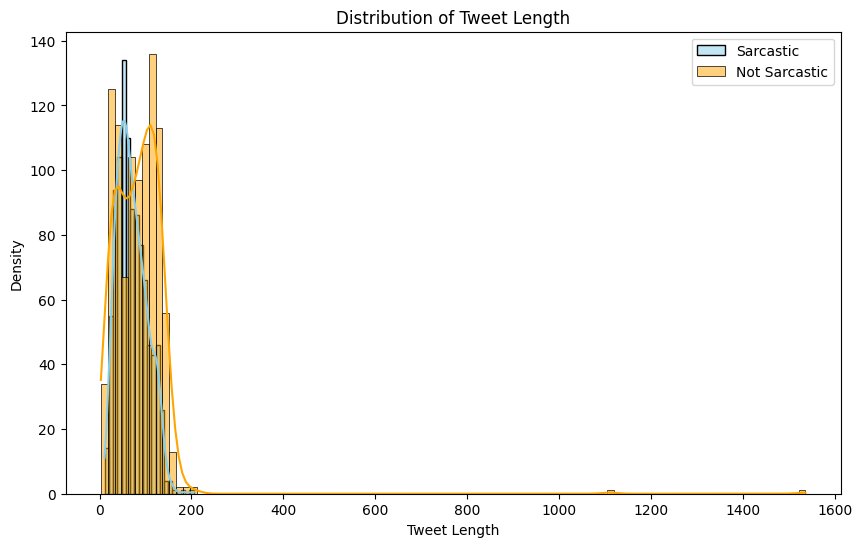

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Clean_Dataset.csv')
print(df['Label'].value_counts())

# Check unique values in 'Label' column
print("Unique labels:", df['Label'].unique())

# Sample sarcastic tweet
sarcastic_tweets = df[df['Label'] == 'sarcastic']['Tweets']
if not sarcastic_tweets.empty:
    print("\nExample sarcastic tweet:")
    print(sarcastic_tweets.iloc[0])
else:
    print("\nNo sarcastic tweets found.")

# Sample non-sarcastic tweet
non_sarcastic_tweets = df[df['Label'] == 'not sarcastic']['Tweets']
if not non_sarcastic_tweets.empty:
    print("\nExample non-sarcastic tweet:")
    print(non_sarcastic_tweets.iloc[0])
else:
    print("\nNo non-sarcastic tweets found.")

# Add a column for tweet length
df['Tweet_Length'] = df['Tweets'].apply(len)

# Plot histograms of tweet length for sarcastic and non-sarcastic tweets
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Label'] == 'sarcastic']['Tweet_Length'], color='skyblue', label='Sarcastic', kde=True)
sns.histplot(df[df['Label'] == 'not sarcastic']['Tweet_Length'], color='orange', label='Not Sarcastic', kde=True)
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.title('Distribution of Tweet Length')
plt.legend()
plt.show()


## Split the dataset into training and testing sets

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('Clean_Dataset.csv')

print("Shape of the dataset:", df.shape)
print(df.head())

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Label'])

print("\nShape of training set:", train_df.shape)
print("Shape of testing set:", test_df.shape)

train_df.to_csv('train_dataset.csv', index=False)
test_df.to_csv('test_dataset.csv', index=False)


Shape of the dataset: (1975, 2)
       Label                                             Tweets
0  sarcastic     I loovee when people text back  unamused_face 
1  sarcastic  Don't you love it when your parents are Pissed...
2  sarcastic      So many useless classes , great to be student
3  sarcastic  Oh how I love getting home from work at am and...
4  sarcastic  I just love having grungy ass hair expressionl...

Shape of training set: (1580, 2)
Shape of testing set: (395, 2)
